In [1]:
import pandas as pd

# **Loading dataset here**

In [ ]:
### loading dataset here
df = pd.read_csv('E:/MSc Data Science University of Hertforshire/Applied Data Science 1/Assignment 1 Statistics and Trends/Data Set/diabetes.csv')

In [ ]:
# some initial rows of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Data Preprocess i.e cleaning and handling inconsistant or missing data
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# its unrealistic having value zero value for glucose, blood pressure, skin thickness, insulin, BMI
# checking zeros for these columns

In [ ]:
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]==0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [ ]:
# Handing Zeros
# replacing 0's with the median of respective column
clean_colum = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in clean_colum:
    df[col] = df[col].replace(0, df[col].median())

#Here is the clean data
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]==0).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [ ]:
# Checking Outliers in the data
import matplotlib.pyplot as plt

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
# selecting few variable as per my analysis perspectives
display(df[['Age', 'BMI', 'Outcome']].describe())
display(df[['Age', 'BMI', 'Outcome']].corr())

,Age,BMI,Outcome
count,768.000000,768.000000,768.000000
mean,50.552083,42.169829,0.531250
std,17.373567,14.397905,0.499348
min,21.000000,18.221452,0.000000
25%,35.000000,29.439073,0.000000
50%,52.000000,42.211642,1.000000
75%,65.250000,54.571367,1.000000
max,80.000000,67.055409,1.000000


,Age,BMI,Outcome
Age,1.000000,-0.014409,0.056018
BMI,-0.014409,1.000000,-0.013661
Outcome,0.056018,-0.013661,1.000000


In [ ]:
#histogram

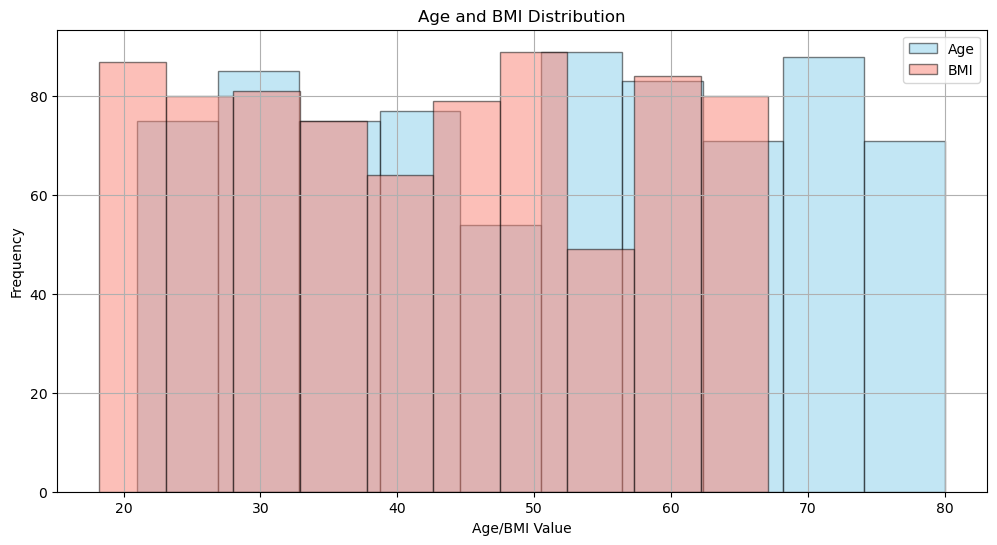

In [ ]:


import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(12, 6))

# Plot histogram for Age
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black', alpha=0.5, label='Age')

# Plot histogram for BMI
plt.hist(df['BMI'], bins=10, color='salmon', edgecolor='black', alpha=0.5, label='BMI')

# Add titles and labels
plt.title('Age and BMI Distribution')
plt.xlabel('Age/BMI Value')
plt.ylabel('Frequency')

# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure before calling show()
plt.savefig(r"C:\Users\gf\Downloads\Age_BMI_Distribution1.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


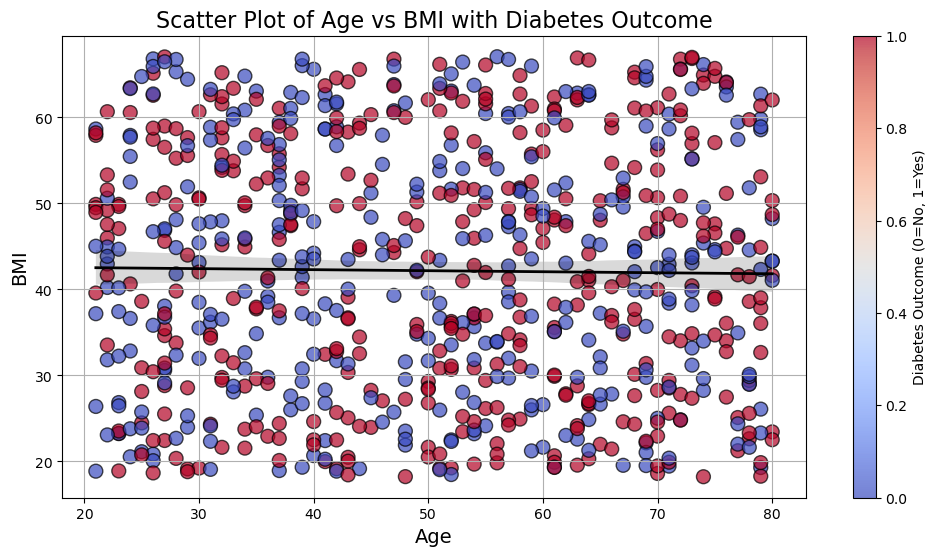

In [ ]:
# Scatter plot creation for group variables bmi and outcome

# Creation
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['Age'], df['BMI'],
                      c=df['Outcome'],  # Color by diabetes outcome
                      cmap='coolwarm',  # Use a colormap
                      alpha=0.7,       # Set transparency
                      s=100,           # Marker size
                      edgecolor='k')   # Black edge color

# Add a colorbar
plt.colorbar(scatter, label='Diabetes Outcome (0=No, 1=Yes)')

# Add titles and labels
plt.title('Scatter Plot of Age vs BMI with Diabetes Outcome', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('BMI', fontsize=14)

# Show grid
plt.grid(True)

# Add a regression line
sns.regplot(x='Age', y='BMI', data=df, scatter=False, color='black', line_kws={'linewidth': 2})
# Save the figure before calling show()
plt.savefig(r"C:\Users\gf\Downloads\Scatter_Plot.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


C:\Users\gf\AppData\Local\Temp\ipykernel_12264\3894635532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='Outcome', data=df, palette='pastel')


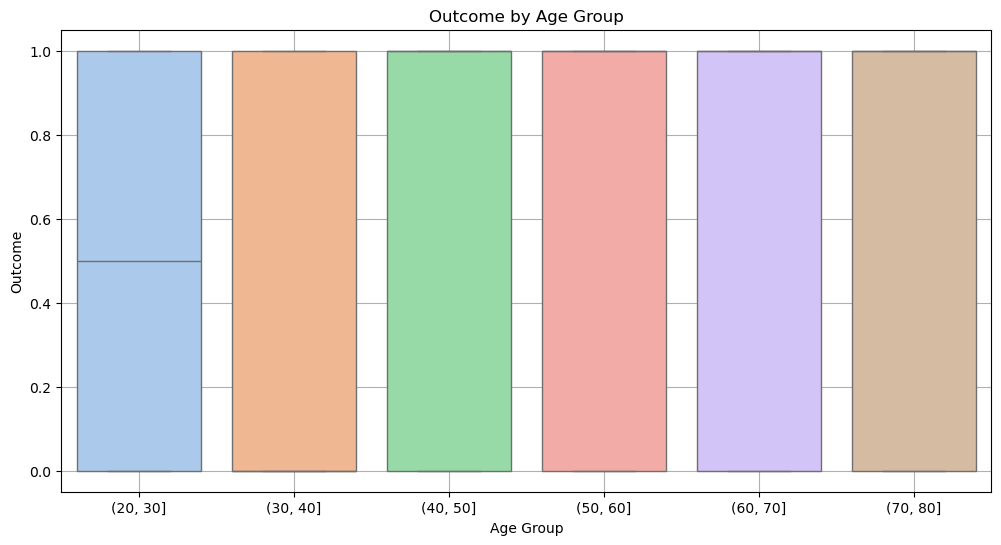

In [ ]:
# Box plot
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Box plot of Blood Sugar Level/Outcome by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroup', y='Outcome', data=df, palette='pastel')
plt.title('Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Outcome')
plt.grid(True)
# Save the figure before calling show()
plt.savefig(r"C:\Users\gf\Downloads\Box_Plot.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\gf\AppData\Local\Temp\ipykernel_12264\169631107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AgeGroup', y='Outcome', data=df, inner="quartile", palette='muted')


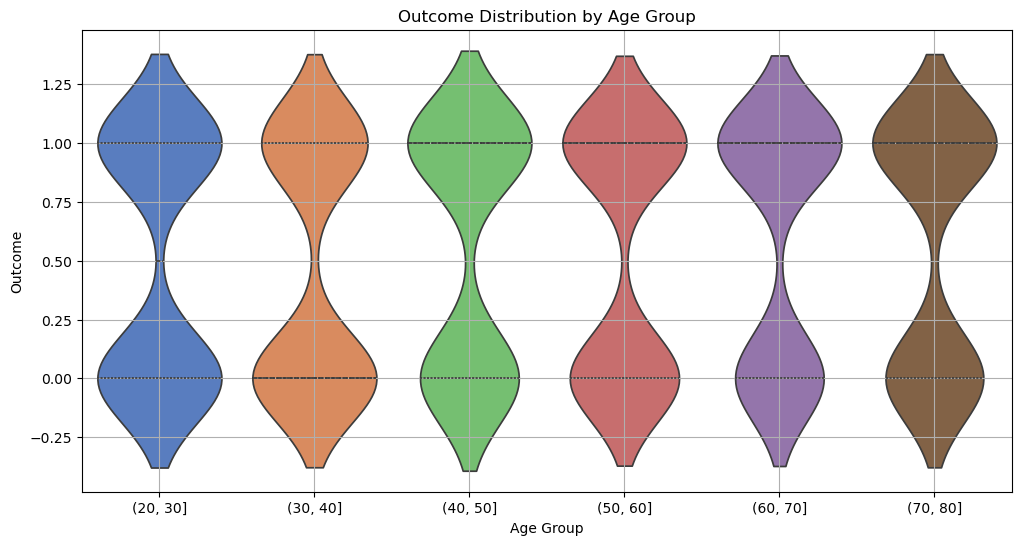

In [ ]:
# Violin plot to observe distribution of Outcome by Age
plt.figure(figsize=(12, 6))
sns.violinplot(x='AgeGroup', y='Outcome', data=df, inner="quartile", palette='muted')
plt.title('Outcome Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Outcome')
plt.grid(True)
# Save the figure before calling show()
plt.savefig(r"C:\Users\gf\Downloads\Violin1.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\gf\AppData\Local\Temp\ipykernel_12264\2682666216.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AgeGroup', y='Outcome', data=df, inner="quartile", palette='muted')
C:\Users\gf\AppData\Local\Temp\ipykernel_12264\2682666216.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='BMI', data=df, inner="quartile", palette='muted')


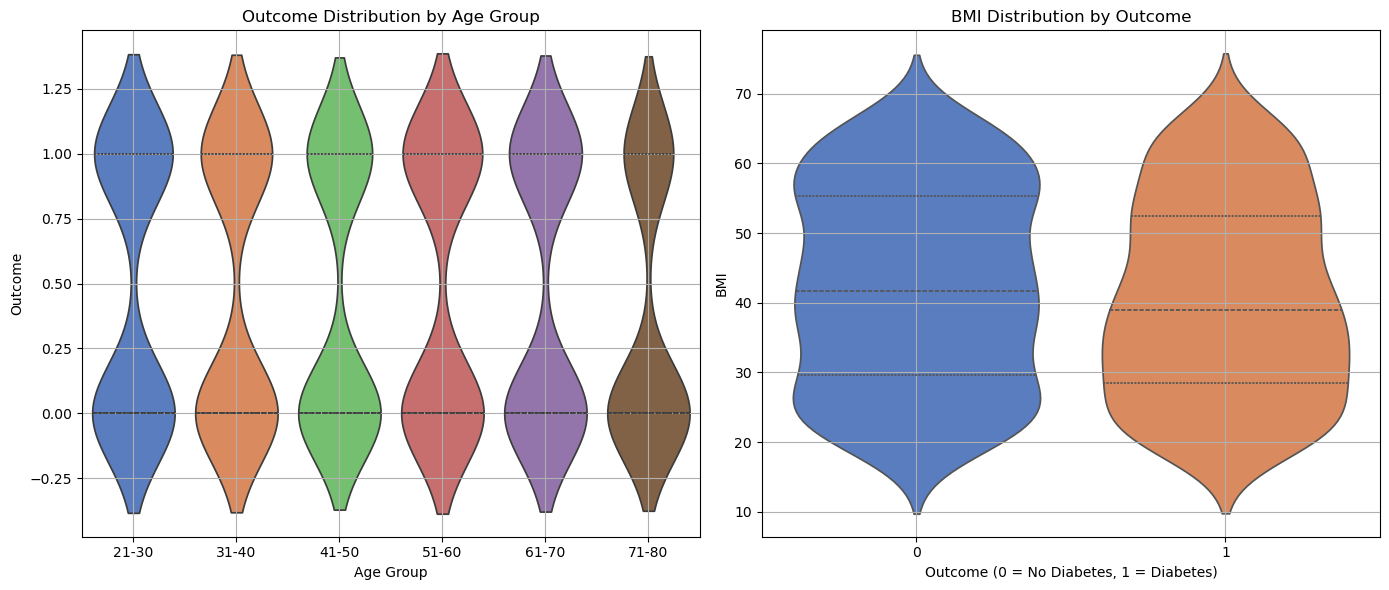

In [ ]:
#Extra work for more analysis


data = {
    'Age': np.random.randint(21, 81, size=768),
    'BMI': np.random.uniform(18.2, 67.1, size=768),
    'Outcome': np.random.choice([0, 1], size=768)
}
df = pd.DataFrame(data)

# Create AgeGroup based on age for better visualization
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Setting the figure size for clarity
plt.figure(figsize=(14, 6))

# First subplot: Violin plot for Age distribution by Outcome
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.violinplot(x='AgeGroup', y='Outcome', data=df, inner="quartile", palette='muted')
plt.title('Outcome Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Outcome')
plt.grid(True)

# Second subplot: Violin plot for BMI distribution by Outcome
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.violinplot(x='Outcome', y='BMI', data=df, inner="quartile", palette='muted')
plt.title('BMI Distribution by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BMI')
plt.grid(True)

# Show the combined plots
plt.tight_layout()
# Save the figure before calling show()
plt.savefig(r"C:\Users\gf\Downloads\Violin2.png", dpi=300, bbox_inches='tight')
plt.show()